# Árbol de decisión

* Es una estructura de datos que se puede utilizar para establecer un conjunto de reglas de decisión ya que se puede representar de forma visual el conjunto de reglas a seguir.

## 1- Estructura básica de un árbol de decisión

<img src="img/tree_1.jpg" width="500">

* Los **nodos** son los puntos a partir de las cuales salen las **ramas**, que se van ramificando.
* El nodo pincipal se llama **nodo raíz**. Y un nodo que no tiene nunguna *rama* que siga al árbol se llama **nodo-hoja (nodo terminal)**.
* Todos los *nodos* representan una única variable y cada una de las ramas representan las posibles *categorias*, los posibles valores que puede tomar esta variable (pueden ser categorias o intervalos). 

## Ejemplo:

<img src="img/tree_2.jpg" width="600">

<img src="img/tree_3.jpg" width="700">

<img src="img/tree_4.jpg" width="600">

## 2- Homogeneidad

* Una distribución homogenea significa que valores similares de la variable objetivo (predictora) tienen que ser agrupados conjuntamente de modo que una decisión concreta pueda ser llevada a cabo, hay que evitar que un árbol tenga más ramas de las necesarias. El objetivo es agrupar ramas similares en una distribución homogénea.

<img src="img/homogeneidad_1.jpg" width="600">

<img src="img/homogeneidad_2.jpg" width="700">

* Vemos que la tabla de Lluvias es la más homogénea que hay.

<img src="img/homogeneidad_3.jpg" width="600">

* La más homogénea es la **C**, luego vendría la *B* y finalmente la *A*.

## 3- Entropía

* La entropía usa la teoría de la información.
* Cuantos más homogeneos sean los nodos de un árbol, se requiere menos información para representarlos.

<img src="img/entropia_1.jpg" width="600">

<img src="img/entropia_2.jpg" width="600">

<img src="img/entropia_3.jpg" width="700">

* **ll** es de llanura, **c** de colina y **m** de meseta.

<img src="img/entropia_4.jpg" width="600">

* El sistema siempre elegirá aquella configuración dónde obtenga mayor ganancia de información.
* En el ejemplo vemos que sale $\Delta H>0$ por lo tanto tenemos ganancia de información para nuestro árbol.

## 4- Algortimos para los árboles de decisión:

### Algoritmo $ID_3$:

**1.** Calculamos la entropía inicial del sistema basándonos en la **variable objetivo** a predecir.

**2.** Calculamos la ganancia de información para cada **variable candidata** para un nodo. Seleccionamos la variable que nos da **máxima ganancia de información** como un nodo de decisión.

**3.** Repetimos el paso *2* para cada rama (valor) de cada nodo (variable candidata). El nuevo nodo identificado es un nodo hoja.

**4.** Comprobamos si el nodo hoja clasifica correctamente todos los datos. Si es así paramos con esa rama. Si no es así volvemos al paso *2* e iteramos para ramificarlo.

### Otros algoritmos:

* **Índice Gini:** Se suele utilizar si la *variable objetivo* es binaria. Se seleccionaría aquella categoría con este índice más alto.

<img src="img/gini_1.jpg" width="600">

* **Reducción de la Varianza:** Si la *variable objetivo* no es una categorica sino una variable numérica continua se puede usar este algortimo. Calcula la varianza para cada uno de los nodos y lleva a cabo una media ponderada de las varianzas para decidir el subnodo en función de cuantos sean los elementos que pertenezcan a alguno de estos.

<img src="img/red_varianza_1.jpg" width="600">

<img src="img/red_varianza_2.jpg" width="600">

* **Detector Automático de la Interacción con Chi Cuadrado $\chi^2$ (CHAID):** Utiliza el estadístico de la $\chi^2$ para encontrar significancia estadística entre un nodo padre y un subnodo hijo. Puede administrar más de una *variable objetivo*.

## 5- Poda del árbol

* A veces tener un árbol más pequeño puede perder eficacia o información pero a cambio podemos tener un resultado más general que nos evite problemas como el *overfitting* si queremos implementar nuestro modelo en otros dataset.
* **La poda del árbol** es una estrategia muy común la de permitir que el árbol crezca hasta que los nodos tengan un número mínimo de instancias dentro de ellos y luego proceder a eliminar del árbol las ramas o los nodos que no nos proporcionan demasiado poder de clasificación en el mismo.
* En la poda se pueden seguir dos caminos: **arriba a abajo** o de **abajo a arriba**.

Se pueden usar dos tipos de métodos:

   **1-** El método clásico es el de **reducción del error en la poda**. Es un método de *arriba a abajo* en el cual se toman los nodos terminales (las hojas), y se reemplazan estas hojas por la categoría más popular que tenga.

   **2-** En cuanto al método de **Poda del coste de complejidad** se trata de ir generando subconjuntos de árboles. Tendríamos $T_0,T_1, T_2,..., T_n$ conjuntos de árboles, donde $T_0$ sería el árbol sin podar, que ha crecido lo máximo posible. Y el caso contrario sería el $T_n$ que sería haber podado hasta dejar el nodo raíz.
* Entonces un árbol intermedio $T_i$ se crea reemplazando un subarbol $T_i-1$ con uno de los nodos hojas, seleccionando evidentemente este nodo hoja con cualquiera de los algoritmos explicados antes *(índice Gini, varianzas...)*.
* El sub árbol a ser reemplazado del árbol anterior (del paso anterior) sigue los 5 pasos explicados abajo.

<img src="img/poda.jpg" width="700">

## 6- Problemas que suelen surgir en los árboles

### 6.1- Las variables numéricas contínuas:

<img src="img/var_continua_1.jpg" width="700">

* Podemos definir unos umbrales o **thresholds** para que la varibale continua sea clasificada o categorizada.
* Calcular estos *thresholds* se convierte en esencial.

**Técnica posible para determinar los threshold:**

<img src="img/var_continua_2.jpg" width="700">

### 6.2- NAs:

<img src="img/var_continua_3.jpg" width="700">
<img src="img/var_continua_3_1.jpg" width="700">

## Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

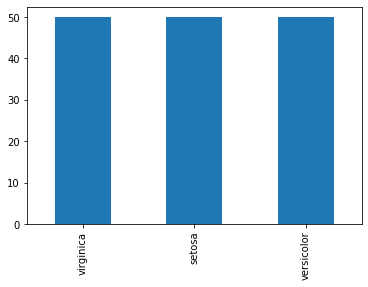

In [4]:
pd.Series(data.Species).value_counts().plot(kind='bar')

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4] #variables predictoras
target = colnames[4] #variable objetivo(Species)

In [7]:
import numpy as np

In [8]:
#creamos la columna de distribucion univforme entre 0 y 1 para entrenar(un 75%)
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75 
data.is_train.head()

0     True
1    False
2     True
3    False
4     True
Name: is_train, dtype: bool

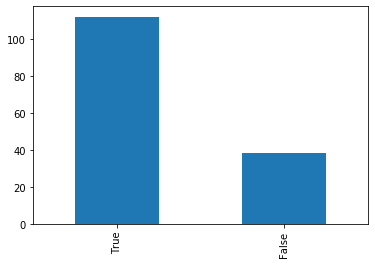

In [9]:
#plt.hist(data.is_train)
pd.Series(data.is_train).value_counts().plot(kind='bar')

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99) 
#Entorpy (ver teoría)
#min_samples_split=20, son el minimo de muestras que queremos pillar, por defecto son 2(no recomendable)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [13]:
preds = tree.predict(test[predictors]) #usando el resultado de tree, vamos a predecir

In [14]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,11,1
virginica,0,0,13


* Todas las setosas se han calsificado como setosas(12).
* 13 versicolor se han calisficado como tal, menos 2 que se han calisficado como virginica.
* 14 virginicas se han clasificado como tal, menos 1 que se ha clasificado como versicolor.

## Visualización del árbol de decisión

In [18]:
from sklearn.tree import export_graphviz

In [19]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [20]:
import os
from graphviz import Source #tal vez tengamos que instalar en Anaconda la libreria graphviz (conda install graphviz python-graphviz)

In [21]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.585\\nsamples = 112\\nvalue = [37, 38, 37]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.65\\nentropy = 1.0\\nsamples = 75\\nvalue = [0, 38, 37]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.384\\nsamples = 40\\nvalue = [0, 37, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 4.85\\nentropy = 0.187\\nsamples = 35\\nvalue = [0, 1, 34]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 0, 32]"] ;\n6 -> 8 ;\n}'

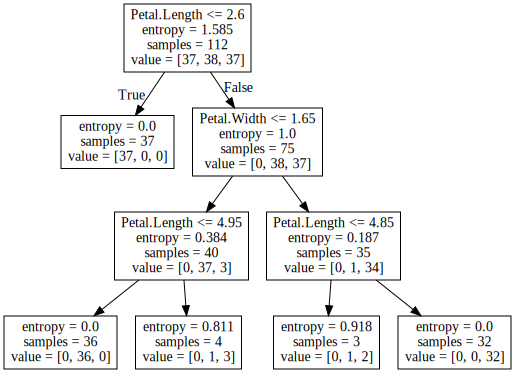

In [22]:
Source(text)

### Modo de lectura(arriba-->abajo):
* Flechas derechas son False, izquierdas True y value[setosa,versicolor,virginica].
* Tenemos 3 decisiones en este árbol. En 3 hojas el árbol ha sido capaz de identificar todas las catagorias.
* Vemos que la longitud de los sépalos le ha dado igual para clasificarlas.

**1-** Si la longitud de los petalos es <=2.35(felcha True), entonces la espacie es una Setosa.

**2-** Si 2.35(False)<anchura petalo<=4.75(True) la especie es virginica.

**3-** Si anchura petalo>4.75(flecha False) y el ancho del petalo es <=1.85(flecha True) es versicolor o virginica

**4-** Si anchura petalo>4.75(False) y el ancho del petalo >1.85(False) es virginica

## Cross Validation para la poda

In [134]:
X = data[predictors]
Y = data[target]

In [135]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [153]:
from sklearn.model_selection import KFold

In [155]:
cv = KFold(n_splits=10, shuffle=True, random_state=1) #cv=crossvalidation. n_splits=grupos de flores. shuffle para rastreo aleatorio

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [158]:
score = np.mean(scores)
score

0.9333333333333333

In [160]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [161]:
predictors #indice para ver que significa cada posicion del array que hay debajo del Score de la tabla de arriba

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Random forest
* Es un algoritmo predictivo de aprendizaje por combinación de ML. Combina modelos independientes para resolver un problema de predicciones en particular.

<img src="img/random_forest_1.jpg" width="900">

### Tipos de algoritmos de ensamblaje:
* **Métodos de promedio:** Se crean varios modelos similares e independientes y se hace un promedio de las predicciones de cada modelo.
* **Métodos de impulso:** Reduce el sesgo del estimador, combinado por cada uno de los árboles y contruyéndo secuencialmente construyéndolo a base de estimadores. Así conseguimos un modelo más robusto a aprtir de varios más débiles.

### Ventajas:

No necesita validación cruzada ya que utiliza el **método de bagging**.

* Con **n** observaciones en el dataset de entrenamiento **T** y **m** variables, decidimos hacer crecer **S** árboles en nuestro bosque. Cada uno será creado con un dataset de entrenamiento separado.
* Las **n** observaciones para cada dataset se toman aleatoriamente con reemplazo del dataset original.
* Cada dataset puede tener observaciones duplicadas y algunas no aparecer nunca como entrenamiento.
* Estos dataset se llaman muestras de *bootstrap* o *bolsas.*

### Funcionamiento del algortimo:

**1-** Tomamos una muestra aleatoria simple de tamaño *n* con reemplazo.

**2-** Tomamos una muestra aleatoria simple de variables predictoras sin reemplazo.

**3-** Construimos un árbol de regresión con los predictores elegidos en el paso 2 y dejamos crecer el árbol sin podarlo.

**4-** Clasificamos las observaciones fuera de la bolsa con dicho árbol y almacenamos el valor o la clase asignada para cada una.
 
**5-** Repetimos los pasos 1 a 4 un número largo de veces para tener el bosque de árboles.

**6-** La predicción final es el promedio de las observaciones de todos los árboles o para clasificación, la clase con mayoría de votos en el conjunto de árboles.

### ¿Por qué funcionan los bosques aleatorios?

* Al ir tomando más y más modelos en consideración se maximiza la reducción de la varianza.

<img src="img/random_forest_2.jpg" width="1000">

### Random forest para clasificación

**Con RandomForestClassifier para problema de clasificación** *(al final de T7-2 se analiza para regresión)*


In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
#n_jobs es el numero de tareas en paralelo que se ejecutarán en el PC tanto para clasificar como predecir
#oob_score es una variable binaria. Con True el modelo hara un muestreo aleatorio para ralizar las predicciones
#n_estimators es el numero de estimadores es el numero de árboles que nuestro random Forests tendrá
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [168]:
forest.oob_decision_function_ #nos indica la probabilidad(0-1) array[setosa,versicolor,virginica]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [169]:
forest.oob_score_

0.9533333333333334